<a href="https://colab.research.google.com/github/MinoDe/Bulldozer-Bluebook-fastai/blob/master/bulldozer_blue_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import os

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [113]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
#Loading dataset
wine = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/RedWine/winequality-red.csv')
#!cat /content/gdrive/My Drive/Colab Notebooks/RedWine/winequality-red.csv

In [0]:
#Cell that should be run everytime we have a new VM
!pip install fastai

##CLASSIFICATION

In [0]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [0]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [18]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [0]:
sns.countplot(wine['quality'])

In [0]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [0]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[ 0.21833164  0.88971201  0.19209222 ...  1.09349989  0.45822284
   1.12317723]
 [-1.29016623 -1.78878251  0.65275338 ... -0.40043872 -0.40119696
   1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 ... -0.07566946  0.51551749
  -0.58738978]
 ...
 [-0.65195559  0.49909822 -1.08752211 ...  1.28836145 -0.68767023
  -0.87248428]
 [-0.24582155 -1.84458448  0.39683051 ...  0.05423824  0.80199076
   1.40827174]
 [-1.46422367 -1.34236676 -0.06383064 ...  0.50891521 -0.68767023
   2.92877575]]


In [0]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [0]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

In [0]:
!pip install fastai==0.7.0

##fastai learning
Course from https://course.fast.ai/lessonsml1/lesson2.html



In [0]:
from fastai.imports import *
from fastai.structured import *

In [0]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [11]:
#!mkdir -p data/bulldozers

#!ls {PATH}


data


In [0]:
#!cp Train.csv data/bulldozers/
PATH = "/content/gdrive/My Drive/Colab Notebooks/Bulldozer-blue-book/data/"
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False,
                    parse_dates = ["saledate"])

In [0]:
def display_all(df):
  with pd.option_context("display.max_rows", 1000):
    with pd.option_context("display.max_columns", 1000):
      display(df)

In [24]:
display_all(df_raw.sample(7))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
370296,2635799,10.714418,1821290,4802,149,99.0,2001,0.0,NaN,744H,744,H,NaN,NaN,Medium,Wheel Loader - 225.0 to 250.0 Horsepower,California,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2010,12,50,17,4,351,False,False,False,False,False,False,1292544000
194491,1632014,10.085809,1227621,4604,132,1.0,1998,NaN,NaN,310E,310,E,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Arizona,BL,Backhoe Loaders,Four Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,5,19,6,1,126,False,False,False,False,False,False,1052179200
217135,1682749,10.736397,1367545,1989,132,1.0,1000,NaN,NaN,EX200LC,EX200,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 19.0 to 21.0 Metr...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2004,6,26,22,1,174,False,False,False,False,False,False,1087862400
147855,1520161,10.518673,651209,2758,132,1.0,1996,NaN,NaN,D5CIII,D5,C,III,NaN,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",Washington,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,4 Valve,NaN,Single Shank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2004,3,14,30,1,90,False,False,False,False,False,False,1080604800
271392,1810667,9.680344,1307074,9578,132,1.0,2005,NaN,NaN,S185,S185,NaN,NaN,NaN,NaN,Skid Steer Loader - Unidentified,Illinois,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,9,38,17,2,261,False,False,False,False,False,False,1221609600
237754,1739034,9.472705,1545148,9060,132,2.0,1000,NaN,NaN,PC40,PC40,NaN,NaN,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2005,2,5,4,4,35,False,False,False,False,False,False,1107475200
163816,1586546,10.518673,1177952,11399,132,1.0,2005,2148.0,Medium,650JLT,650,J,NaN,LT,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",Georgia,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2009,9,37,10,3,253,False,False,False,False,False,False,1252540800


In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

##PreProcessing
Random Forest

In [0]:
#m = RandomForestRegressor(n_jobs = -1)
#m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

In [27]:
add_datepart(df_raw, 'saledate')

KeyError: ignored

In [28]:
df_raw.saleDayofweek.head()

0    3
1    4
2    3
3    3
4    3
Name: saleDayofweek, dtype: int64

In [0]:
train_cats(df_raw)

In [0]:
df_raw.UsageBand.cat.categories
#Ordering the categories so it makes sense
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace = True)

In [31]:
display_all(df_raw.tail())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
401120,6333336,2.225610,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401121,6333337,2.230622,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401122,6333338,2.235387,1887659,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401123,6333341,2.208822,1903570,21435,149,2.0,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800
401124,6333342,2.192262,1926965,21435,149,2.0,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800


In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [33]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [34]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9826554636698824

In [35]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
n_valid = 12000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
  res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
        m.score(X_train, y_train), m.score(X_valid, y_valid)]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [37]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 40s, sys: 113 ms, total: 1min 40s
Wall time: 51.2 s
[0.00904799968706548, 0.025231904181277038, 0.9825004414421895, 0.8845853770431956]


In [0]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice', subset=30000)
X_train, _ = split_vals(df_trn,20000)
y_train, _ = split_vals(y_trn, 20000)

In [39]:
m = RandomForestRegressor(n_jobs=1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.71 s, sys: 6.96 ms, total: 2.72 s
Wall time: 2.72 s
[0.011214280691652983, 0.037800137566473324, 0.9718482311531244, 0.7409715037134863]


##Single Tree

In [40]:
m = RandomForestRegressor(n_jobs=1, n_estimators =1, max_depth = 3, bootstrap=False)
m.fit(X_train, y_train)
print_score(m)

[0.051246914962852656, 0.05738574655485091, 0.4121069908583358, 0.4030075269886477]


In [0]:
#draw_tree(m.estimators_[0], df_trn, precision=3)

##Bagging


In [42]:
m = RandomForestRegressor(n_jobs=1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.011278307375760422, 0.040391264279110446, 0.9715258547216032, 0.7042425603401938]


In [43]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([2.22033, 2.23303, 2.22033, 2.26341, 2.24427, 2.24841, 2.1958 , 2.31113, 2.22033, 2.19226]),
 2.2349294835634734,
 2.2088215008013257)

In [44]:
preds.shape

(10, 12000)

###Using Extra Trees Regressor

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
e = RandomForestRegressor(n_jobs=1)
e.fit(X_train, y_train)
print_score(e)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.011265640011991804, 0.03694992160741339, 0.9715897809449802, 0.7524928061504472]


###Plotting the predictions

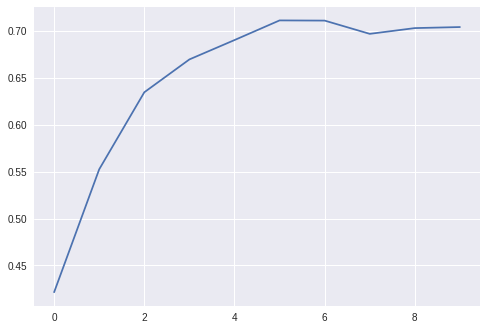

In [46]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(10)])

In [47]:
m = RandomForestRegressor(n_jobs=1,  n_estimators =20)
m.fit(X_train, y_train)
print_score(m)

[0.010286238348229204, 0.03703090516336145, 0.9763148570517116, 0.7514066886621823]


In [48]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([2.23539, 2.1958 , 2.26341, 2.2701 , 2.20882, 2.1958 , 2.23539, 2.25239, 2.1958 , 2.23539, 2.1958 ,
        2.1958 , 2.19008, 2.19008, 2.1958 , 2.1958 , 2.20882, 2.1958 , 2.28769, 2.21474]),
 2.2179349947245415,
 2.2088215008013257)

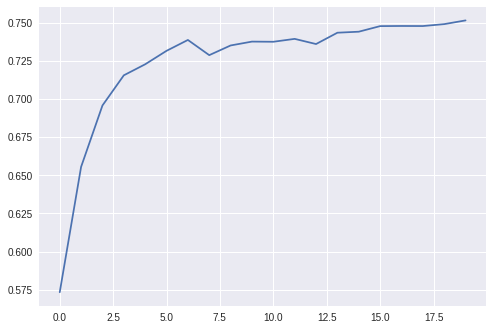

In [49]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(20)])

###OOB(Out-of-bag) score

In [50]:
m = RandomForestRegressor(n_jobs=1,  n_estimators =40, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[0.009710528627773905, 0.036552052549879, 0.9788919269103329, 0.7577943206383494, 0.8503085409257034]


#Handling Over-fitting

###Sub-sampling

In [0]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
set_rf_samples(20000)

###Running with 100 decision trees

In [53]:
m = RandomForestRegressor(n_jobs=2,  n_estimators =100, oob_score = False)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 17s, sys: 99.4 ms, total: 1min 17s
Wall time: 39.4 s
[0.022389399217460342, 0.02618633855702999, 0.8928463868181907, 0.8756887765923964]


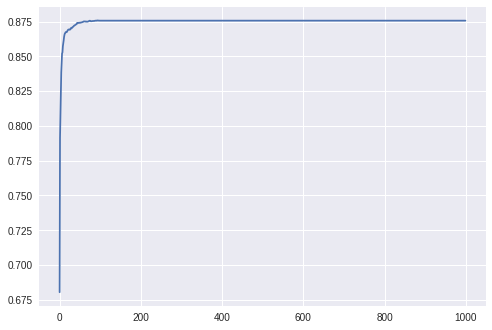

In [54]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(100)])

###Running with 200 decision trees

In [0]:
m = RandomForestRegressor(n_jobs=2,  n_estimators =200, oob_score = False)
%time m.fit(X_train, y_train)
print_score(m)

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(200)])

###Running with 4000 decision trees

In [0]:
m = RandomForestRegressor(n_jobs=2,  n_estimators =4000, oob_score = False)
%time m.fit(X_train, y_train)
print_score(m)

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(4000)])

###Subsample size 40000

In [0]:
set_rf_samples(40000)

In [0]:
m = RandomForestRegressor(n_jobs=2,  n_estimators =100, oob_score = False)
%time m.fit(X_train, y_train)
print_score(m)

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(100)])

###Running with 200 decision trees

In [0]:
m = RandomForestRegressor(n_jobs=2,  n_estimators =200, oob_score = False)
%time m.fit(X_train, y_train)
print_score(m)

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(200)])

###Running with 4000 decision trees

In [0]:
m = RandomForestRegressor(n_jobs=2,  n_estimators =4000, oob_score = False)
%time m.fit(X_train, y_train)
print_score(m)

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(4000)])

In [0]:
reset_rf_samples()

##Tree building parameters

In [60]:
m = RandomForestRegressor(n_jobs=-1,  n_estimators =40, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 38 s, sys: 296 ms, total: 38.2 s
Wall time: 23.4 s
[0.022631580932924576, 0.026473644770401053, 0.890515730500516, 0.8729460247264577, 0.8787308725173755]


In [61]:
m = RandomForestRegressor(n_jobs=-1, min_samples_leaf=3,  n_estimators =40, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 30.8 s, sys: 124 ms, total: 30.9 s
Wall time: 18.9 s
[0.023140364208810202, 0.0263551610996588, 0.8855377391738389, 0.8740807483027481, 0.8763610712646691]



Max_features - Does a column subsampling to build each tree. The columns are chosen randomly 

In [64]:
m = RandomForestRegressor(n_jobs=-1, min_samples_leaf=3, max_features=0.7,  n_estimators =40, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 24.4 s, sys: 137 ms, total: 24.5 s
Wall time: 15.7 s
[0.02306846388851865, 0.026256492458649163, 0.8862479343515746, 0.8750218182008278, 0.8773973456758672]
